-------------------------------------------Industrial Copper Modeling--------------------------------------------------

Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc,accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pickle

Data Cleaning by Pandas

In [2]:
#Converting xlsx to Pandas Data Frame
df=pd.read_excel('C:/Users/jonna/Downloads/Industrial_Copper_Modeling-main/Industrial_Copper_Modeling-main/copper_dataset.xlsx')


In [3]:
pd.set_option("display.max_columns",None)
df.head(3)


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


In [4]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')

# Find the minimum value in the "quantity tons" column
min_quantity_tons = df["quantity tons"].describe()

# Display the result
min_quantity_tons

count    1.816720e+05
mean     5.874926e+03
std      2.349081e+06
min     -2.000000e+03
25%      1.097030e+01
50%      3.036464e+01
75%      6.716061e+01
max      1.000000e+09
Name: quantity tons, dtype: float64

In [5]:
#Checking the type of the dataset
print(df.shape)
df.info()

(181673, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 19.4+ MB


In [6]:
#Checking for Null values in columns
df.isna().sum()

id                   2
item_date            1
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [7]:
#Material_ref Conversion
df['material_ref'].fillna('Nil', inplace=True)
df['material_ref'] = df['material_ref'].str.lstrip('0')
#Date Conversion
df["item_date"] = pd.to_datetime(df["item_date"]).dt.date
df['delivery date']=pd.to_datetime(df['delivery date']).dt.date

In [8]:
#Removing NaN values
df.dropna(inplace=True)

In [9]:
#Converting Specific columns to Integer dataype
num_columns = ['quantity tons', 'customer', 'country', 'application', 'width', 'product_ref','selling_price','thickness']
for column_name in num_columns:
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

In [10]:
#Creating the copy of the dataframe
df_new=df.copy()

C:\Users\jonna\AppData\Local\Temp\ipykernel_54540\865563622.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[col])


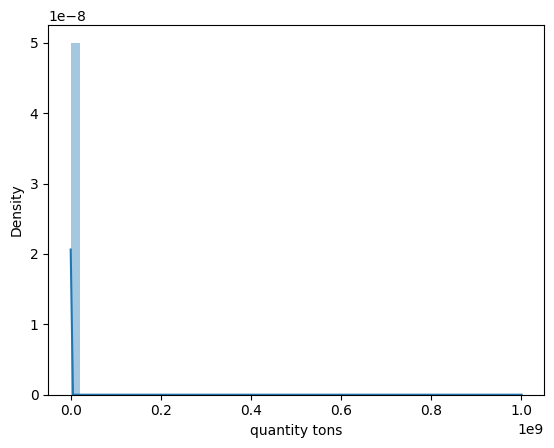

C:\Users\jonna\AppData\Local\Temp\ipykernel_54540\865563622.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[col])


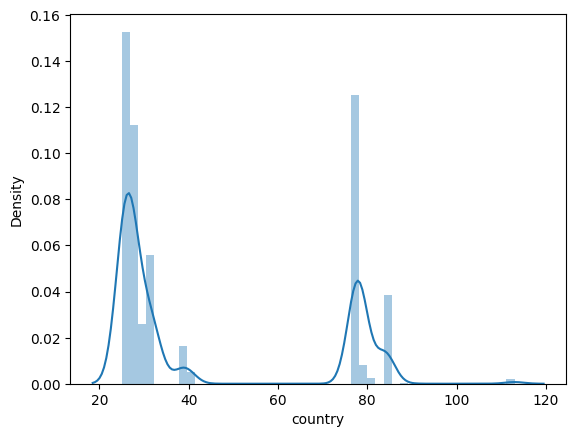

C:\Users\jonna\AppData\Local\Temp\ipykernel_54540\865563622.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[col])


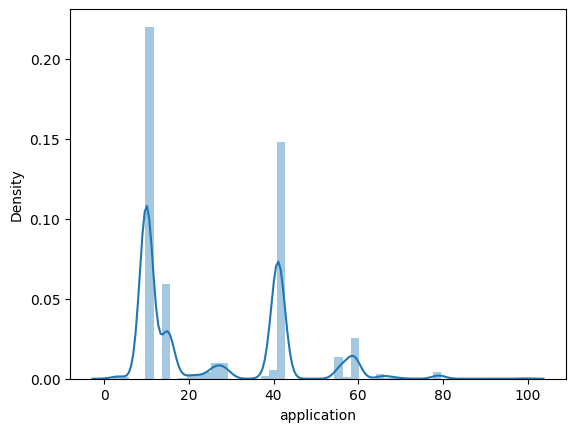

C:\Users\jonna\AppData\Local\Temp\ipykernel_54540\865563622.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[col])


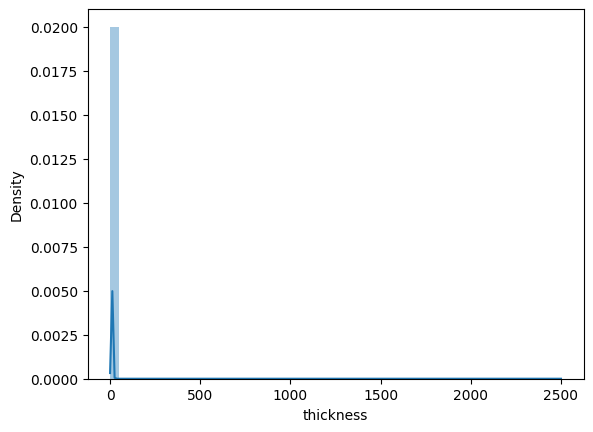

C:\Users\jonna\AppData\Local\Temp\ipykernel_54540\865563622.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[col])


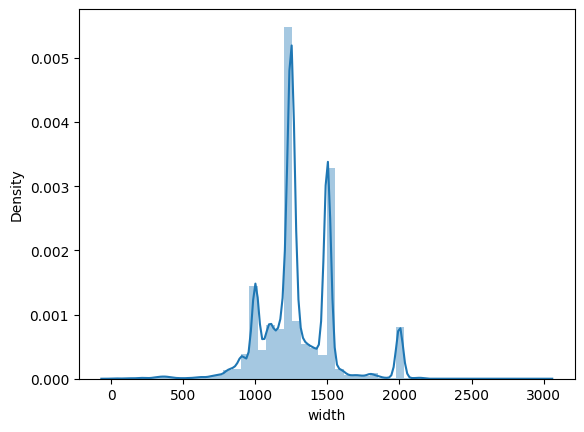

C:\Users\jonna\AppData\Local\Temp\ipykernel_54540\865563622.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[col])


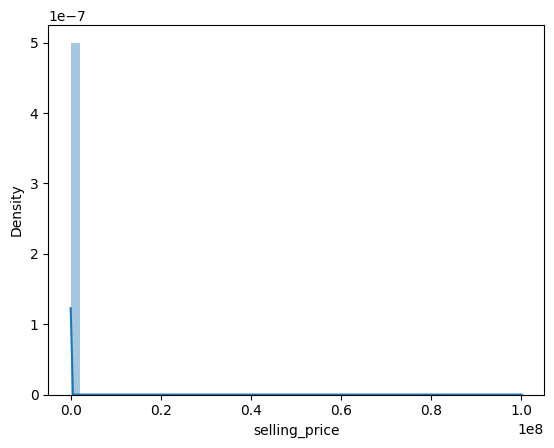

In [11]:
#Checking for Data Skewness
columns=['quantity tons','country','application','thickness','width','selling_price']
for col in columns:
   sns.distplot(df_new[col])
   plt.show()

Transforming Data Skewness       

#Data Skewness is Discovered in Selling_price, Quantity tons and in Thickness.

In [12]:
# STEP_1:-------------------------------------------------------------------------------------------------------------
#In logarithmic transformation, the natural logarithm is undefined for non-positive values (zero and negative values).
#So Removing the  values less than or eqaul to zero.
df_new.loc[df_new['selling_price'] <= 0, 'selling_price'] = np.nan
df_new.loc[df_new['quantity tons'] <= 0, 'quantity tons'] = np.nan
df_new.loc[df_new['thickness'] <= 0, 'thickness'] = np.nan

In [13]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')

# Find the minimum value in the "quantity tons" column
min_quantity_tons = df["quantity tons"].describe()

# Display the result
min_quantity_tons

count    1.816350e+05
mean     5.876103e+03
std      2.349320e+06
min     -2.000000e+03
25%      1.096843e+01
50%      3.036395e+01
75%      6.716187e+01
max      1.000000e+09
Name: quantity tons, dtype: float64

In [14]:
df_new['quantity tons'].describe()

count    1.816310e+05
mean     5.876243e+03
std      2.349346e+06
min      1.000000e-05
25%      1.096917e+01
50%      3.036411e+01
75%      6.716436e+01
max      1.000000e+09
Name: quantity tons, dtype: float64

In [15]:
#Checking for NaN Values
df_new.isna().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [16]:
#Dropping NaN values
df_new.dropna(inplace=True)

C:\Users\jonna\AppData\Local\Temp\ipykernel_54540\3788578917.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['selling_price_no_skew'])


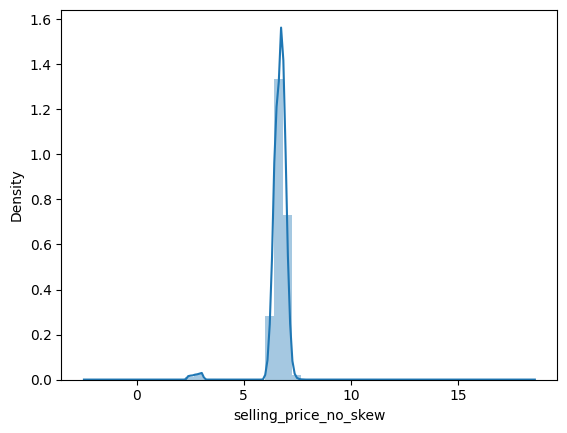

C:\Users\jonna\AppData\Local\Temp\ipykernel_54540\3788578917.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['quantity tons_no_skew'])


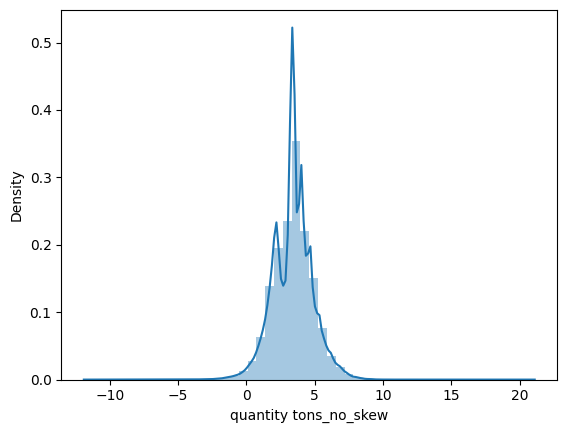

C:\Users\jonna\AppData\Local\Temp\ipykernel_54540\3788578917.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['thickness_no_skew'])


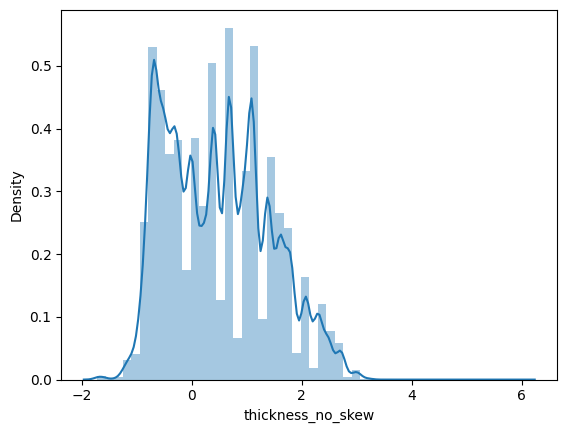

In [17]:
#STEP 2:--------------------------------------------------------------------------------------------------------------
#Converting the Data Points into Logarithmic Values

df_new['selling_price_no_skew'] = np.log(df_new['selling_price'])
sns.distplot(df_new['selling_price_no_skew'])
plt.show()

df_new['quantity tons_no_skew'] = np.log(df_new['quantity tons'] )
sns.distplot(df_new['quantity tons_no_skew'])
plt.show()

df_new['thickness_no_skew'] = np.log(df_new['thickness'])
sns.distplot(df_new['thickness_no_skew'])
plt.show()  

In [18]:
df_new.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_no_skew,quantity tons_no_skew,thickness_no_skew
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-01-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,1970-01-01,854.0,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,1970-01-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,104991,1668701718,1970-01-01,1047.0,6.953684,6.643822,-0.223144


Correlation Matrix

<Axes: >

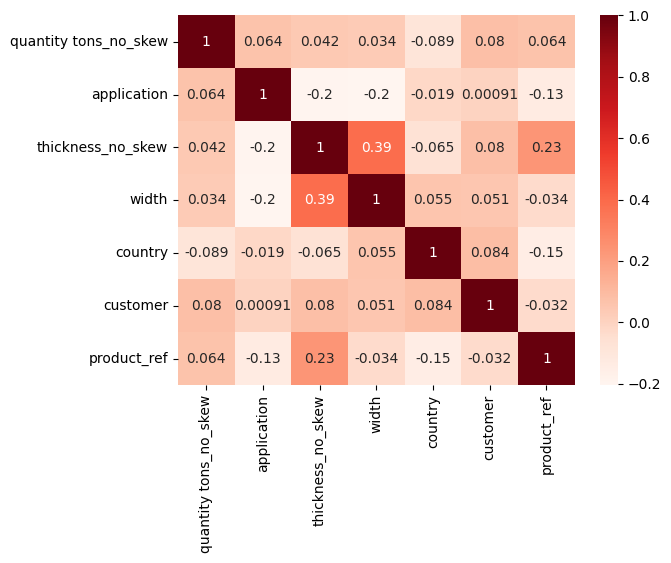

In [19]:

X=df_new[['quantity tons_no_skew','application','thickness_no_skew','width','country','customer','product_ref']].corr()
sns.heatmap(X, annot=True, cmap="Reds")


Building Machine Learning REGRESSION Model 

In [20]:
#Splitting into Features and Labels
X=df_new[['quantity tons_no_skew','status','item type','application','thickness_no_skew','width','country','customer','product_ref']]
y=df_new['selling_price_no_skew']

In [21]:
#Encoding "item type" Column:
encoder_1=OneHotEncoder(handle_unknown='ignore')
encoder_1.fit(X[['item type']])
X_encoded_1= encoder_1.fit_transform(X[['item type']]).toarray()
#---------------------------------------------------------------------------------------------------------------------
#Encoding "Status" Column:
encoder_2= OneHotEncoder(handle_unknown='ignore')
encoder_2.fit(X[['status']])
X_encoded_2 = encoder_2.fit_transform(X[['status']]).toarray()
#-------------------------------------------------------------------------------------------------------------------------
#Joining Encoded Columns with other Columns
X_new= np.concatenate((X[['quantity tons_no_skew', 'application', 'thickness_no_skew', 'width','country','customer','product_ref']].values, X_encoded_1,X_encoded_2), axis=1)

In [22]:
#Splitting Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=42)

In [23]:
#Standardization using Standard Scalar
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [24]:
#Decision Tree Regression Model
model= DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

#Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("----------------------------DecisionTreeRegressor---------------------------------")
print('Mean Squared Error:', round(mse,3))
print('Mean Absolute Error:', round(mae,3))
print("R2_Score:",round(r2,3))

----------------------------DecisionTreeRegressor---------------------------------
Mean Squared Error: 0.036
Mean Absolute Error: 0.123
R2_Score: 0.885


In [25]:
#Testing the Model with new user input
new_data_1= np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_data_encoder_1 = encoder_1.transform(new_data_1[:, [7]]).toarray()
new_data_encoder_2 = encoder_2.transform(new_data_1[:, [8]]).toarray()
new_data_1 = np.concatenate((new_data_1[:, [0,1,2, 3, 4, 5, 6,]], new_data_encoder_1, new_data_encoder_2 ), axis=1)
new_data_1 = sc.transform(new_data_1)
prediction_1 = model.predict(new_data_1)
print("Predicted selling price:", np.exp(prediction_1))

Predicted selling price: [655.]


c:\Users\jonna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\jonna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [26]:
#Saving the model into ".pkl" file

with open("model.pkl", "wb") as file_1:
    pickle.dump(model, file_1)

with open("sc.pkl", "wb") as file_2:
    pickle.dump(sc, file_2)

with open("encoder_1.pkl", "wb") as file_2:
    pickle.dump(encoder_1, file_2)

with open("encoder_2.pkl", "wb") as file_2:
    pickle.dump(encoder_2, file_2)



Building Machine Learning CLASSIFICATION Model 

In [27]:
#Considering only "Won" and "Lost" in "status" column (Bianry classification)
df_new_2 = df_new[df_new['status'].isin(['Won', 'Lost'])]
#------------------------------------------------------------------------------------------------------------------------
#Splitting Features and Labels
X= df_new_2[['quantity tons_no_skew','item type','selling_price','application','thickness_no_skew','width','country','customer','product_ref']]
y=df_new_2 ['status']


In [28]:
#Encoding "item type" column:
encoder_3 = OneHotEncoder(handle_unknown='ignore')
encoder_3.fit(X[['item type']])
X_encoded_3 = encoder_3.fit_transform(X[['item type']]).toarray()
#------------------------------------------------------------------------------------------------------------------------
#Encoding "status" column (TARGET_VARIABLE):
binarizer= LabelBinarizer()
binarizer.fit(y) 
y= binarizer.fit_transform(y)
#------------------------------------------------------------------------------------------------------------------------
X_new_2 = np.concatenate((df_new_2[['quantity tons_no_skew','selling_price','application','thickness_no_skew','width','country','customer','product_ref']].values, X_encoded_3), axis=1)
tar=np.unique(y).tolist()
print("Target variables:",tar)

Target variables: [0, 1]


In [29]:
#Splitting Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_new_2 , y, test_size=0.2, random_state=42)


In [30]:
#Standardization using Standard Scalar
sc_2= StandardScaler()
X_train= sc_2.fit_transform(X_train)
X_test= sc_2.transform(X_test)

In [31]:
#Decision Tree Classifier Model
model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)

Accuracy: 0.911
Confusion Matrix:
[[ 5687  1331]
 [ 1332 21736]]


<function matplotlib.pyplot.show(close=None, block=None)>

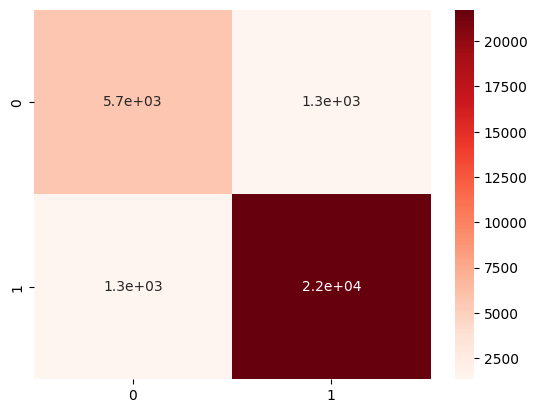

In [32]:
#Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:",round(accuracy,3))
print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix,annot=True,cmap="Reds")
plt.show

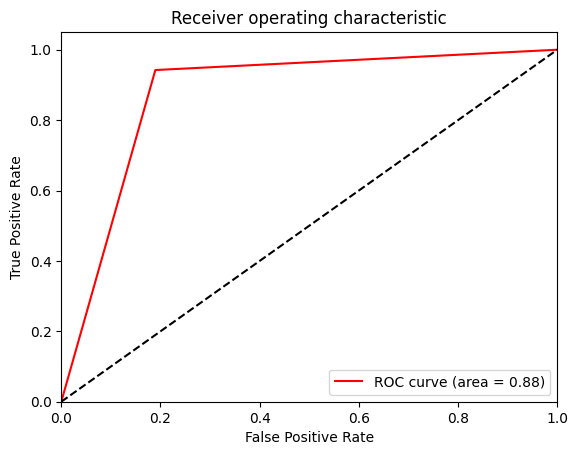

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      7018
           1       0.94      0.94      0.94     23068

    accuracy                           0.91     30086
   macro avg       0.88      0.88      0.88     30086
weighted avg       0.91      0.91      0.91     30086



In [33]:
#ROC_AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc,color="red")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
#Classification Report
class_report=classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

In [34]:
#Testing the Model with new user input
new_data_2 = np.array([[np.log(680), np.log(888), 10, np.log(2.5),1640,29.0,28907654,1765487908,'W']])
new_data_encoder_3 = encoder_3.transform(new_data_2 [:, [8]]).toarray()
new_data_2  = np.concatenate((new_data_2 [:, [0,1,2, 3, 4, 5, 6,7]], new_data_encoder_3), axis=1)
new_data_2  = sc_2.transform(new_data_2)
prediction_2  = model_2.predict(new_data_2)
if prediction_2==1:
    print("status: 'Won'")
else:
    print( "status: 'Lost'")

status: 'Won'


c:\Users\jonna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [35]:
#Saving the model into ".pkl" file
with open("model_2_class.pkl", "wb") as file_1:
    pickle.dump(model_2, file_1) 

with open("sc_2.pkl", "wb") as file_2:
    pickle.dump(sc_2, file_2)

with open("encoder_3.pkl", "wb") as file_2:
    pickle.dump(encoder_3, file_2)
    
with open("binarizer.pkl", "wb") as file_2:
    pickle.dump(binarizer, file_2)
